In [ ]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
zip_filename = next(iter(uploaded))

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
  zip_ref.extractall('extracted_images')
print("Files extracted")
os.listdir("extracted_images")

Saving apple.zip to apple.zip
Files extracted


['tomato.jpg', 'apple-gala.png', 'apple.jpg', 'tomato1.jpg']

In [ ]:
extract_path = "extracted_images"
if not os.path.exists(extract_path):
  raise FileNotFoundError(f"Folder {extract_path} not found. Make sure it extracted properly.")
image_files = [f for f in os.listdir(extract_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print("Image files found:", image_files)

Image files found: ['tomato.jpg', 'apple-gala.png', 'apple.jpg', 'tomato1.jpg']


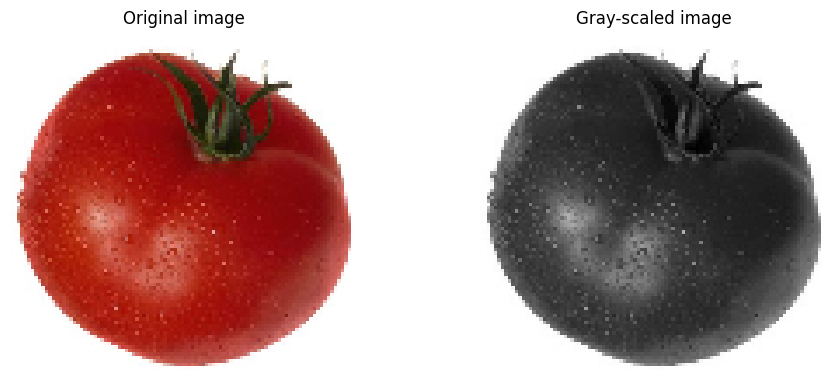

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

if len(image_files) == 0:
  raise ValueError('No images found in image_files')
image_path = os.path.join(extract_path, image_files[0])
image = cv2.imread(image_path)

if image is None:
  raise ValueError("Image could not be loaded. Please check the file format.")
image_resized = cv2.resize(image, (100,100))

gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Gray-scaled image')
plt.imshow(gray_image, cmap = 'gray')
plt.axis('off')

plt.tight_layout()
plt.show()

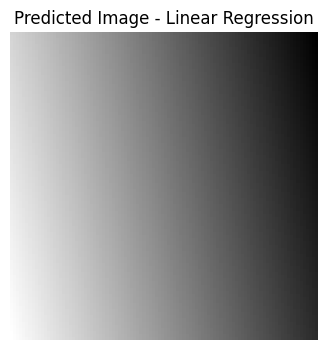

100

In [5]:
height , width = gray_image.shape
x = np.array([[i,j] for i in range(height) for j in range(width)])
y = gray_image.flatten()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train,y_train)

predicted = model.predict(x).reshape(height,width)

plt.figure(figsize = (5,4))
plt.title("Predicted Image - Linear Regression")
plt.imshow(predicted, cmap = 'gray')
plt.axis('off')
plt.show()